PROBABILIDAD DE DEFAULT DE LOS TITULOS ARGENTINOS

In [66]:
#Importo librerias (e instalo alguna si hace falta)
#pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import scipy.optimize as sco
from scipy import interpolate
from scipy.optimize import newton
import statsmodels.api as sm
import pandas_datareader as pdr
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
#Import the cash flows of the national bond AL30
Bonds_LocalLaw = ['AL29', 'AL30', 'AL35', 'AE38', 'AL41']
Bonds_ForeignLaw = ['GD29', 'GD30', 'GD35', 'GD38', 'GD41', 'GD46']

Bonds = Bonds_LocalLaw + Bonds_ForeignLaw

excel = 'Input.xlsx'
data_frames = []

for i in Bonds:
    sheet = i
    df = pd.read_excel(excel, sheet_name=sheet, index_col='Fecha Pago')
    df.index = pd.to_datetime(df.index)
    data_frames.append({i: df})

Bonds_CashFlows = {nombre: dataframe for elemento in data_frames for nombre, dataframe in elemento.items()}


#Import the prices of each day
#sheet = 'PRICES Local Law'

sheet_AL = 'PRICES Local Law'
sheet_GD = 'PRICES Foreign Law'
data_frames = []

df_AL = pd.read_excel(excel, sheet_name=sheet_AL, index_col='date')

for i in Bonds_LocalLaw:
    df = df_AL[i]
    df = pd.DataFrame(df)
    df.index = pd.to_datetime(df.index)
    data_frames.append({i: df})

df_GD = pd.read_excel(excel, sheet_name=sheet_GD, index_col='date')

for i in Bonds_ForeignLaw:
    df = df_GD[i]
    df = pd.DataFrame(df)
    df.index = pd.to_datetime(df.index)
    data_frames.append({i: df})

Bonds_Prices = {nombre: dataframe for elemento in data_frames for nombre, dataframe in elemento.items()}




In [3]:
# Importo el Riesgo País
sheet = 'Country Risk'
CR = pd.read_excel(excel, sheet_name=sheet, index_col='date')
CR.index = pd.to_datetime(CR.index)

#Importo el volumen negociado
sheet = 'Volume Local Law'
Volume_LocalLaw = pd.read_excel(excel, sheet_name=sheet, index_col='date')
Volume_LocalLaw.index = pd.to_datetime(Volume_LocalLaw.index)

sheet = 'Volume Foreign Law'
Volume_ForeignLaw = pd.read_excel(excel, sheet_name=sheet, index_col='date')
Volume_ForeignLaw.index = pd.to_datetime(Volume_ForeignLaw.index)


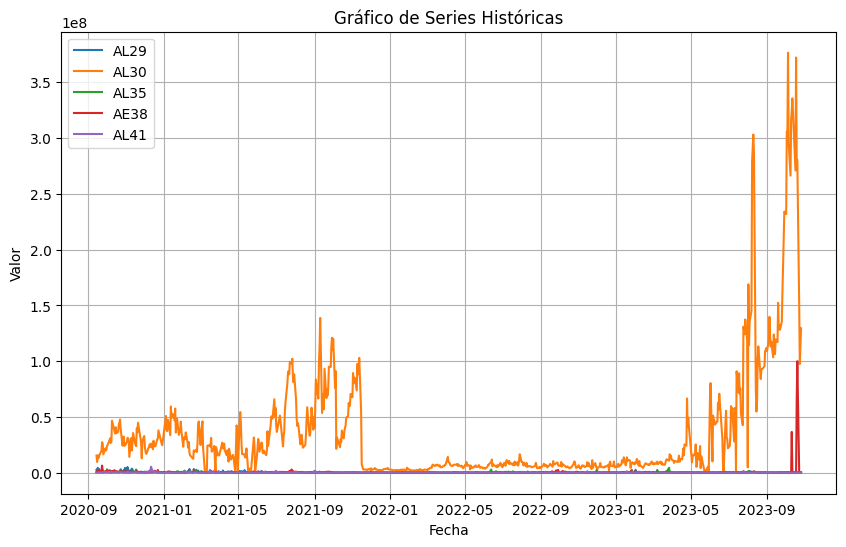

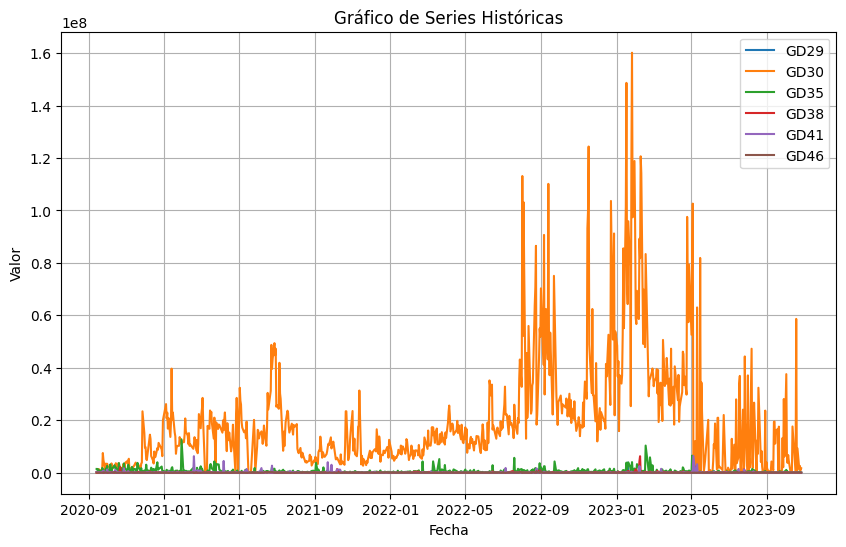

In [4]:
#Grafico los volumenes de cada Bono de Ley Local

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

for i in Bonds_LocalLaw:
    plt.plot(Volume_LocalLaw.index, Volume_LocalLaw[i], label=i)

plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

#Grafico las PDs de cada Bono de Ley Extranjera

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

for i in Bonds_ForeignLaw:
    plt.plot(Volume_ForeignLaw.index, Volume_ForeignLaw[i], label=i)

plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()


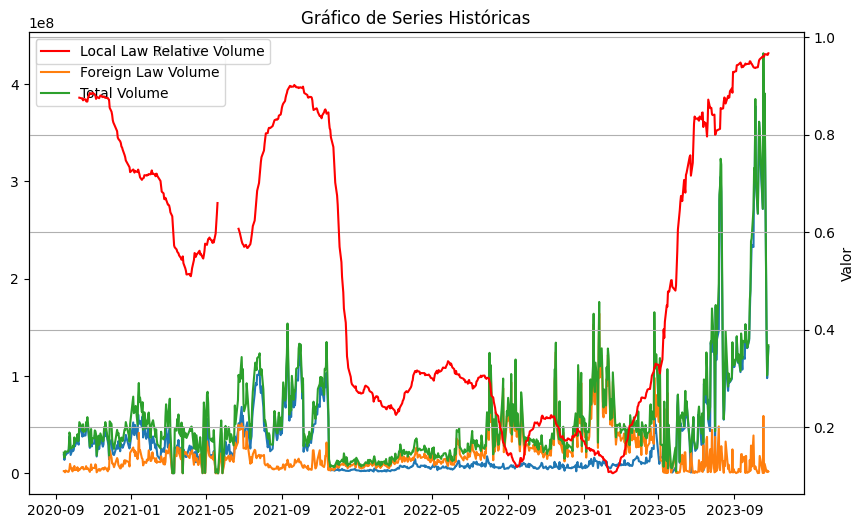

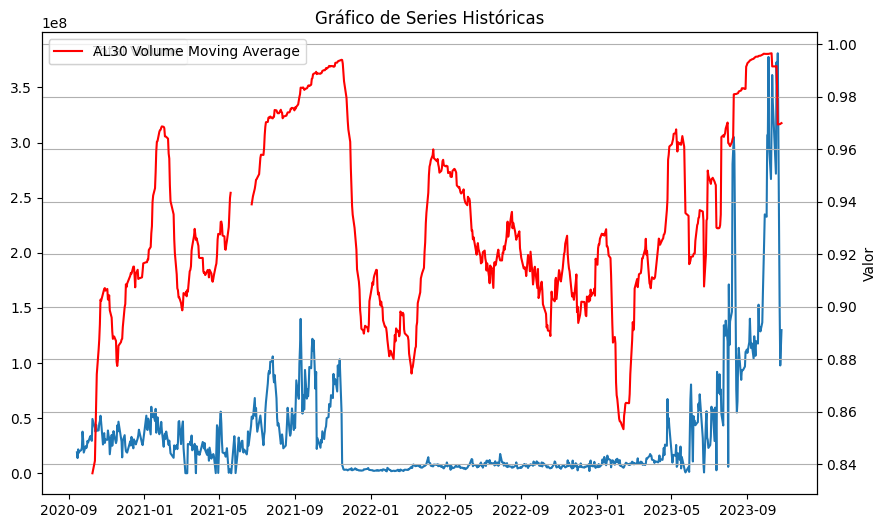

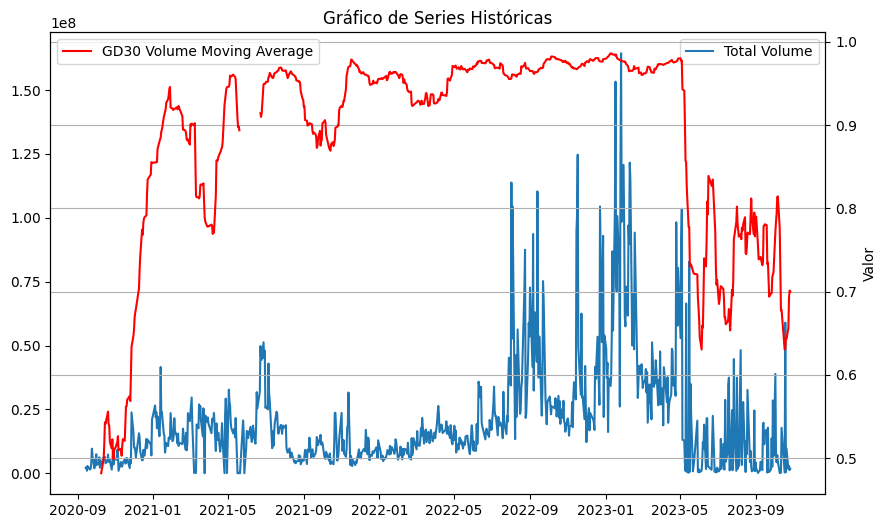

In [5]:
#Grafico los Volumenes totales negociados totalizando lo Ley Local y Extranjero

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

Total_Volume = pd.DataFrame()
Total_Volume['Local Law'] = Volume_LocalLaw['Total']
Total_Volume['Foreign Law'] = Volume_ForeignLaw['Total']
Total_Volume['Total'] = Total_Volume['Local Law'] + Total_Volume['Foreign Law']

# Graficar cada serie y agregar una leyenda

plt.plot(Total_Volume.index, Total_Volume['Local Law'], label='Local Law Volume')
plt.plot(Total_Volume.index, Total_Volume['Foreign Law'], label='Foreign Law Volume')
plt.plot(Total_Volume.index, Total_Volume['Total'], label='Total Volume')


plt.legend()

# Crear un segundo eje de ordenadas (secundario)
plt.twinx()

LocalLaw_RelativeVolume = (Total_Volume['Local Law'] / Total_Volume['Total']).rolling(20).mean()

# Agregar la serie secundaria al eje secundario
plt.plot(LocalLaw_RelativeVolume.index, LocalLaw_RelativeVolume, color='r', label='Local Law Relative Volume')

# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

#Grafico las PDs de cada Bono de Ley Local

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

plt.plot(Volume_LocalLaw.index, Volume_LocalLaw['Total'], label='Total Volume')

plt.legend()

# Crear un segundo eje de ordenadas (secundario)
plt.twinx()

AL30_RelativeVolume = (Volume_LocalLaw['AL30'] / Volume_LocalLaw['Total']).rolling(20).mean()

# Agregar la serie secundaria al eje secundario
plt.plot(AL30_RelativeVolume.index, AL30_RelativeVolume, color='r', label='AL30 Volume Moving Average')

# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

#Grafico las PDs de cada Bono de Ley Extranjera

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

plt.plot(Volume_ForeignLaw.index, Volume_ForeignLaw['Total'], label='Total Volume')

plt.legend()

# Crear un segundo eje de ordenadas (secundario)
plt.twinx()

GD30_RelativeVolume = (Volume_ForeignLaw['GD30'] / Volume_ForeignLaw['Total']).rolling(20).mean()

# Agregar la serie secundaria al eje secundario
plt.plot(GD30_RelativeVolume.index, GD30_RelativeVolume, color='r', label='GD30 Volume Moving Average')

# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [12]:
#Supuestos Iniciales
#Recovery Rate
RR = 0.3


In [6]:
#Buscando la ETTI Risk Free de USA.

#Para ver gráficamente cómo sería la interpolación
def EjemploSplineInterpolator(x, y):
    tck1 = interpolate.splrep(x, y, s=0)
    tck2 = interpolate.splrep(x, y, s=1)
    xForPlot = np.linspace(0, 10950, num=10951, endpoint=True)
    yForPlot1 = interpolate.splev(xForPlot, tck1, der=0)
    yForPlot2 = interpolate.splev(xForPlot, tck2, der=0)
    plt.figure(4)
    plt.plot(x, y, 'o', linewidth=0, label="data")
    plt.plot(xForPlot, yForPlot1, '-', label="Spline smoothness=0")
    plt.plot(xForPlot, yForPlot2, '--', label="Spline smoothness=1")
    plt.legend()
    plt.show()

#Armo función que interpolaría

def interpolador(date, historical_rates):
    date = pd.to_datetime(date)
    x = historical_rates.columns.to_list()
    y = historical_rates.loc[date].to_list()
    tck = interpolate.splrep(x, y, s=0)
    return tck



In [7]:

# Importar curva de tasas de interés desde FRED

#Tickers de los Bonos del Tesoro Americano de cada vencimiento
t1m = 'DGS1MO'
t3m = 'DGS3MO'
t6m = 'DGS6MO'
t1y = 'DGS1'
t2y = 'DGS2'
t3y = 'DGS3'
t5y = 'DGS5'
t7y = 'DGS7'
t10y = 'DGS10'
t20y = 'DGS20'
t30y = 'DGS30'

# Fecha de inicio y fecha de fin para los datos históricos.

start_date = datetime.date(2020, 9, 1)
end_date = datetime.date(2023, 10, 26)

# Obtener datos de la curva de tasas de interés desde FRED
nodo1m = pdr.get_data_fred(t1m, start_date, end_date)
nodo3m = pdr.get_data_fred(t3m, start_date, end_date)
nodo6m = pdr.get_data_fred(t6m, start_date, end_date)
nodo1y = pdr.get_data_fred(t1y, start_date, end_date)
nodo2y = pdr.get_data_fred(t2y, start_date, end_date)
nodo3y = pdr.get_data_fred(t3y, start_date, end_date)
nodo5y = pdr.get_data_fred(t5y, start_date, end_date)
nodo7y = pdr.get_data_fred(t7y, start_date, end_date)
nodo10y = pdr.get_data_fred(t10y, start_date, end_date)
nodo20y = pdr.get_data_fred(t20y, start_date, end_date)
nodo30y = pdr.get_data_fred(t30y, start_date, end_date)


In [8]:
#Rangos de fechas que quisiera tener una ETTI, pongo todos los días hasta los fines de semana para evitar el error en los que hubo feriado en USA y no en Argentina y viceversa
fechas_intermedias = [start_date + datetime.timedelta(days=d) for d in range((end_date - start_date).days + 1)]
fechas_intermedias
fechas = pd.DataFrame({'Fecha': fechas_intermedias})
fechas = fechas.set_index('Fecha')
fechas

Curvas = fechas
Curvas = Curvas.join(nodo1m, how="left")
Curvas = Curvas.join(nodo3m, how="left")
Curvas = Curvas.join(nodo6m, how="left")
Curvas = Curvas.join(nodo1y, how="left")
Curvas = Curvas.join(nodo2y, how="left")
Curvas = Curvas.join(nodo3y, how="left")
Curvas = Curvas.join(nodo5y, how="left")
Curvas = Curvas.join(nodo7y, how="left")
Curvas = Curvas.join(nodo10y, how="left")
Curvas = Curvas.join(nodo20y, how="left")
Curvas = Curvas.join(nodo30y, how="left")
Curvas = Curvas.fillna(method='ffill')
nuevos_nombres = {'DGS1MO': 30, 'DGS3MO': 90, 'DGS6MO': 180, 'DGS1': 365, 'DGS2': 730, 'DGS3': 1095, 'DGS5': 1825, 'DGS7': 2555, 'DGS10': 3650, 'DGS20': 7300, 'DGS30': 10950}
Curvas.rename(columns=nuevos_nombres, inplace=True)

In [10]:
EjemploSplineInterpolator()

TypeError: EjemploSplineInterpolator() missing 2 required positional arguments: 'x' and 'y'

El valor interpolado en x = 2.5 es y = 6.25


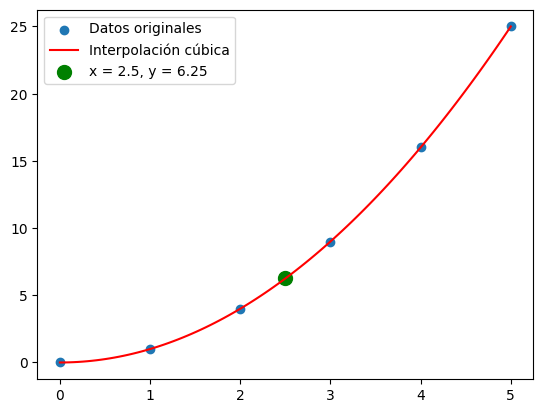

In [10]:
import numpy as np
from scipy.interpolate import splrep, splev
import matplotlib.pyplot as plt

# Datos de ejemplo (abscisas y ordenadas)
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])

# Realizar interpolación cúbica
tck = splrep(x, y)

# Valor de abscisa donde deseas evaluar la función interpolante
x_eval = 2.5

# Evaluar la función interpolante en x_eval
y_eval = splev(x_eval, tck)

# Imprimir el resultado
print(f"El valor interpolado en x = {x_eval} es y = {y_eval}")

# Graficar los datos originales y la interpolación
x_new = np.linspace(x.min(), x.max(), 100)
y_new = splev(x_new, tck)

plt.scatter(x, y, label="Datos originales")
plt.plot(x_new, y_new, label="Interpolación cúbica", color='red')
plt.scatter(x_eval, y_eval, color='green', label=f'x = {x_eval}, y = {y_eval}', s=100)
plt.legend()
plt.show()



In [9]:
#Creo función para calcular los precios del AL30 según cada curva de tasas
def NPV(cf, date, historical_rates):
    date = pd.to_datetime(date)
    cf2 = cf.loc[cf.index > date, ['A+R']]
    cf2['Days to payment'] = (cf2.index - date).days
#    cf2['Risk Free Rate'] = cf2['Days to payment'].map(rates['Rate'])
    cf2['Risk Free Rate'] = interpolate.splev(cf2['Days to payment'],interpolador(date, historical_rates))/100
    cf2['Present Value Factor'] = (1 + cf2['Risk Free Rate'] )**-(cf2['Days to payment']/365)
    cf2['Cash Flow Present Value'] = cf2['A+R'] * cf2['Present Value Factor']
    price = sum(cf2['Cash Flow Present Value'])
    return price

NPV(Bonds_CashFlows['AL30'], '2023-09-19' , Curvas )


87.39974680799335

In [10]:
#Para el cálculo de la pérdida esperada a cada momento y traerlo a valor actual necesito calcular
#la curva forward en ese momento para traerlo y por eso es que creo esta función
def NPV_Forward(cf, date, date_forward, historical_rates):
    date = pd.to_datetime(date)
    cf2 = cf.loc[cf.index > date, ['A+R']]
    date_forward = pd.to_datetime(date_forward)
    cf2 = cf2.loc[cf2.index >= date_forward, ['A+R']]
    cf2['Days to payment'] = (cf2.index - date).days
#    cf2['Risk Free Rate'] = cf2['Days to payment'].map(rates['Rate'])
    cf2['Risk Free Rate'] = interpolate.splev(cf2['Days to payment'],interpolador(date, historical_rates))/100
#    cf2['Present Value Factor'] = (1 + cf2['Risk Free Rate'] )**-(cf2['Days to payment']/365)
    cf2['Fwd Risk Free Rate'] = ((1+ cf2['Risk Free Rate'])**(cf2['Days to payment']/365) / (1+ cf2['Risk Free Rate'][0])**(cf2['Days to payment'][0]/365))**(365/(cf2['Days to payment'] - cf2['Days to payment'][0])) -1
    cf2['Fwd Present Value Factor'] = (1 + cf2['Fwd Risk Free Rate'])**-((cf2['Days to payment']-cf2['Days to payment'][0])/365)
    cf2['Cash Flow Present Value'] = cf2['A+R'] * cf2['Fwd Present Value Factor']
    price = sum(cf2['Cash Flow Present Value'])
    return price

NPV_Forward(Bonds_CashFlows['AL30'], '2023-09-19' , Bonds_CashFlows['AL30'][Bonds_CashFlows['AL30'].index > pd.to_datetime('2023-09-19')].index[2], Curvas )

88.70534182659152

df = pd.DataFrame(interpolador('19-9-2023', Curvas)[0:2], columns=['Columna1', 'Columna2'])
df
interpolador('19-9-2023', Curvas)
#to_excel('C:/Users/juana/OneDrive/UCEMA/Quant - Finanzas Cuantitativas/TP Final/tuplas.xlsx', index=False)

In [13]:
#Armo función para calcular el valor actual de la pérdida esperada a cada fecha
def LossPV(cf, date, historical_rates):
    date = pd.to_datetime(date)
    cf2 = cf.loc[cf.index > date, ['VR','A+R']]
#    cf2['Risk Free Price'] = [NPV_Forward(cf2, dates, date_forward, historical_rates) + cupon['A+R'] for dates, cupon in cf2.iterrows()]
    cf2['Risk Free Price'] = [NPV_Forward(cf, date, dates, historical_rates) for dates, cupon in cf2.iterrows()]
    cf2['Recovery'] = cf2['VR'] * RR
    cf2['Default Loss'] = cf2['Risk Free Price'] - cf2['Recovery']
    cf2['Days to payment'] = (cf2.index - date).days
    #cf2['Risk Free Rate'] = cf2['Days to payment'].map(ETTI['Rate'])
    cf2['Risk Free Rate'] = interpolate.splev(cf2['Days to payment'],interpolador(date, historical_rates))/100
    cf2['Present Value Factor'] = (1 + cf2['Risk Free Rate'] )**-(cf2['Days to payment']/365)
    cf2['Present Value of Default Loss'] = cf2['Present Value Factor'] * cf2['Default Loss']
    PVDL = sum(cf2['Present Value of Default Loss'])
    return PVDL

LossPV(Bonds_CashFlows['AL30'],'2023-09-19', Curvas)


470.15073323917346

In [14]:
# Armo un Data Frame donde voy a ir colocando cada uno de las columnas para el
#cálculo de las probabilidades

def PDs(historical_prices, cash_flows, historical_rates):

#historical_prices: sería la matriz de precios y fechas del activo

    summary = historical_prices
    summary['Risk Free Value'] = [NPV(cash_flows, dates, historical_rates) for dates, prices in summary.iterrows()]
    summary['Credit Spread'] = summary['Risk Free Value'] - summary.iloc[:, 0]
    summary['Present Value of Default Loss'] = [LossPV(cash_flows, dates, historical_rates) for dates, prices in summary.iterrows()]
    summary['Default Probability'] = summary['Credit Spread'] / summary['Present Value of Default Loss'] * 2
    Default_Prob = summary['Default Probability']
    Default_Prob = pd.DataFrame(Default_Prob)
    Default_Prob.columns = [summary.columns[0]]
    return Default_Prob

#PDs(Bonds_Prices['AL30'], Bonds_CashFlows['AL30'], Curvas)

In [14]:
#summary.to_excel('C:/Users/juana/OneDrive/UCEMA/Quant - Finanzas Cuantitativas/TP Final/GitHub/tp_quant_Git Desktop/Summary.xlsx', index=True)
#Pruebas de la evolución de Default:

#Graficar los Ley Local y Ley Extranjera
#Graficar La prob promedio de lo que es Ley Local y Ley Extranjera y también el GAP entre ambas
#Graficar la prob promedio según fecha de Vto

#Incorporar quizás fechas importantes que podrían haber hecho saltos en el Riesgo País o Prob de Default


In [59]:
#Graficar los Ley Local y Ley Extranjera
# Como primer paso voy a armar un Data Frame con las PDs de los Ley Local y otro con los Ley Extranjera

PDs_LocalLaw = pd.DataFrame()

for i in Bonds_LocalLaw:
    PDs_LocalLaw[i] = PDs(Bonds_Prices[i], Bonds_CashFlows[i], Curvas)

PDs_LocalLaw

PDs_ForeignLaw = pd.DataFrame()

for i in Bonds_ForeignLaw:
    PDs_ForeignLaw[i] = PDs(Bonds_Prices[i], Bonds_CashFlows[i], Curvas)

PDs_ForeignLaw

,GD29,GD30,GD35,GD38,GD41,GD46
date,,,,,,
2020-09-14,0.113340,0.111136,0.082928,0.083893,0.076028,0.073700
2020-09-15,0.113343,0.111138,0.082929,0.083894,0.076029,0.073704
2020-09-16,0.119526,0.115188,0.084766,0.085867,0.077898,0.073740
2020-09-17,0.126301,0.119171,0.086139,0.086333,0.079664,0.074224
2020-09-18,0.125264,0.117757,0.086588,0.087178,0.079677,0.073886
...,...,...,...,...,...,...
2023-10-20,0.265148,0.229041,0.120738,0.118118,0.105707,0.111787
2023-10-23,0.264694,0.252188,0.125196,0.120990,0.105742,0.109869
2023-10-24,0.273979,0.243931,0.124954,0.127104,0.111661,0.116070


In [36]:
PDs_Marginales = pd.concat([PDs_LocalLaw, PDs_ForeignLaw], axis=1)

PDs_Mg = PDs_Marginales.copy()
PDs_Mg['Local Law Default Probability'] = PDs_Mg.mean(axis=1)
PDs_Mg = PDs_Mg['Local Law Default Probability']

NameError: name 'PDs_LocalLaw' is not defined

In [15]:
#Grafico las PDs de cada Bono de Ley Local

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

for i in Bonds_LocalLaw:
    plt.plot(PDs_LocalLaw.index, PDs_LocalLaw[i], label=i)

plt.legend()

# Crear un segundo eje de ordenadas (secundario)
plt.twinx()

# Agregar la serie secundaria al eje secundario
plt.plot(CR.index, CR, color='r', label='Country Risk')

# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

#Grafico las PDs de cada Bono de Ley Extranjera

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

for i in Bonds_ForeignLaw:
    plt.plot(PDs_ForeignLaw.index, PDs_ForeignLaw[i], label=i)

plt.legend()

# Crear un segundo eje de ordenadas (secundario)
plt.twinx()

# Agregar la serie secundaria al eje secundario
plt.plot(CR.index, CR, color='r', label='Country Risk')

# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

#Calculo el coeficiente de Correlación

Correlation_LocalLaw = {'Bond' : [i for i in Bonds_LocalLaw],
        'Correlation' : [CR['ARG'].corr(PDs_LocalLaw[i]) for i in Bonds_LocalLaw]}

Correlation_LocalLaw = pd.DataFrame(Correlation_LocalLaw)


Correlation_ForeignLaw = {'Bond' : [i for i in Bonds_ForeignLaw],
        'Correlation' : [CR['ARG'].corr(PDs_ForeignLaw[i]) for i in Bonds_ForeignLaw]}

Correlation_ForeignLaw = pd.DataFrame(Correlation_ForeignLaw)
Correlation = pd.concat([Correlation_LocalLaw, Correlation_ForeignLaw], ignore_index=True)
Correlation


NameError: name 'PDs_LocalLaw' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Preguntas a responder
#0) Mostrar la evolución del volumen negociado y cuál es el monto emitido por cada Bono para tomar una dimensión.
# También estaría bueno ver la evolución de la TIRs

#*1)Porque hay tanto Gap entre lo que es 2029 y 2030 respecto al resto de los maturity?
#Hay un efecto maturity por el cual las PDs cambien tanto?

#2)En los GDs puede verse que las PDs 35 38 y 41 46 son muy similares, a que se debe?
#Esto no ocurre en los AL, hay una oportunidad de arbitraje?

#3) Puede ser que haya una influencia importante respecto al volumen negociado?
#Porque los más cortos lo lógico es que estén distorcionados por el accionar del gobierno

#4) Cuál es la fecha de mayor gap entre lo que es ley local y ley extranjera y cuanto fue ese gap

#5) Buscar las fechas en las que hubo mayor variación de las PDs y buscar qué pasó en esos momentos

#*6) Grafico la evolución contra el riesgo país? Quizás valga la pena mostrar la correlación y se responda
# el punto 5

#7) Cuál es la relación entre la PDs y las TIR? Entiendo debería ser positiva

1)Porque hay tanto Gap entre lo que es 2029 y 2030 respecto al resto de los maturity? Hay un efecto maturity por el cual las PDs cambien tanto?

Por lo que veo la TIR es el doble en caso de los vtos del 29 y 30 respecto al resto de los años. Entiendo que lo más cortos son los que están intervenidos, justamente al tener menor duration son menos sensibles al movimiento de la curva de tasas (un cambio significativo en por ejemplo una curva de USA, por ejemplo, puede tener un impacto importante en la curva de ARG), y también se dice que el Gobierno podría estar interesado en comprar los bonos cortos (que son los más baratos, para cancelar deuda).


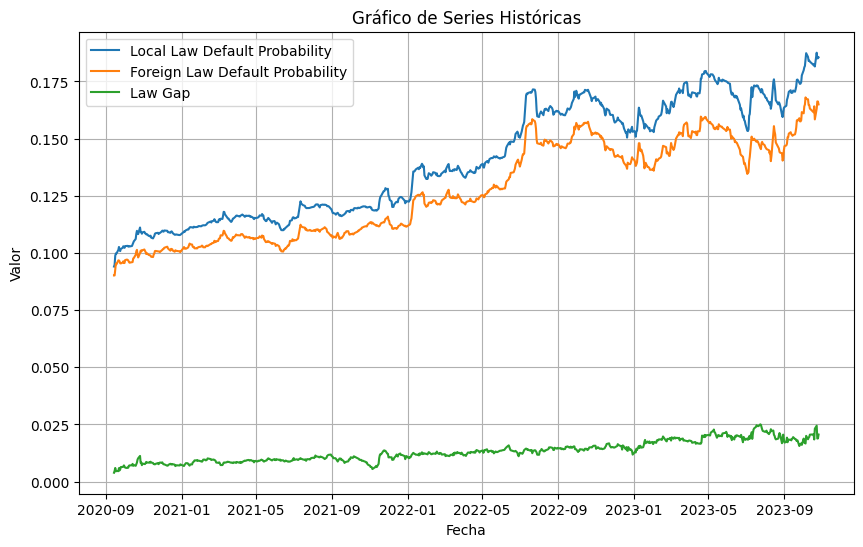

In [17]:
#Graficar La prob promedio de lo que es Ley Local y Ley Extranjera y también el GAP entre ambas
#Graficar el GAP promedio histórico

LL = PDs_LocalLaw.copy()
LL['Local Law Default Probability'] = LL.mean(axis=1)
LL = LL['Local Law Default Probability']

FL = PDs_ForeignLaw.copy()
FL['Foreign Law Default Probability'] = FL.mean(axis=1)
FL = FL['Foreign Law Default Probability']

Law_Gap = LL - FL

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

plt.plot(LL.index, LL, label='Local Law Default Probability')
plt.plot(FL.index, FL, label='Foreign Law Default Probability')
plt.plot(Law_Gap.index, Law_Gap, label='Law Gap')


# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()


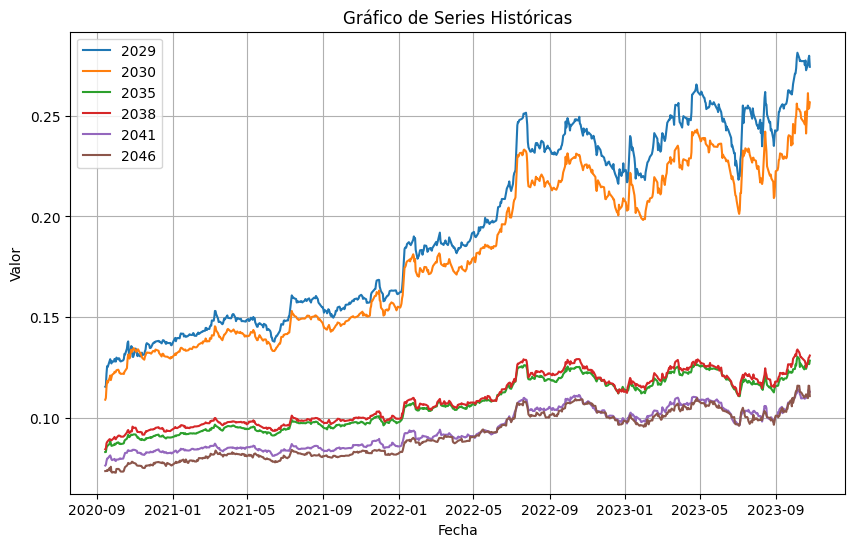

In [18]:
#Graficar la prob promedio según fecha de Vto

# Maturity 2029

PDs_2029 = pd.DataFrame()
PDs_2029['AL29'] = PDs_LocalLaw['AL29']
PDs_2029['GD29'] = PDs_ForeignLaw['GD29']
PDs_2029['2029'] = PDs_2029.mean(axis=1)
PDs_2029 = PDs_2029['2029']

PDs_2030 = pd.DataFrame()
PDs_2030['AL30'] = PDs_LocalLaw['AL30']
PDs_2030['GD30'] = PDs_ForeignLaw['GD30']
PDs_2030['2030'] = PDs_2030.mean(axis=1)
PDs_2030 = PDs_2030['2030']

PDs_2035 = pd.DataFrame()
PDs_2035['AL35'] = PDs_LocalLaw['AL35']
PDs_2035['GD35'] = PDs_ForeignLaw['GD35']
PDs_2035['2035'] = PDs_2035.mean(axis=1)
PDs_2035 = PDs_2035['2035']

PDs_2038 = pd.DataFrame()
PDs_2038['AE38'] = PDs_LocalLaw['AE38']
PDs_2038['GD38'] = PDs_ForeignLaw['GD38']
PDs_2038['2038'] = PDs_2038.mean(axis=1)
PDs_2038 = PDs_2038['2038']

PDs_2041 = pd.DataFrame()
PDs_2041['AL41'] = PDs_LocalLaw['AL41']
PDs_2041['GD41'] = PDs_ForeignLaw['GD41']
PDs_2041['2041'] = PDs_2041.mean(axis=1)
PDs_2041 = PDs_2041['2041']

PDs_2046 = pd.DataFrame()
PDs_2046['GD46'] = PDs_ForeignLaw['GD46']
PDs_2046['2046'] = PDs_2046.mean(axis=1)
PDs_2046 = PDs_2046['2046']

PDs_Maturity = pd.DataFrame()
PDs_Maturity['2029'] = PDs_2029
PDs_Maturity['2030'] = PDs_2030
PDs_Maturity['2035'] = PDs_2035
PDs_Maturity['2038'] = PDs_2038
PDs_Maturity['2041'] = PDs_2041
PDs_Maturity['2046'] = PDs_2046
PDs_Maturity

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

for i in PDs_Maturity.columns:
    plt.plot(PDs_Maturity.index, PDs_Maturity[i], label=i)

# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [19]:
from scipy.optimize import minimize

# Definir la función objetivo y su derivada
def objetivo(x):
    return x[0]**2 + x[1]**2

def derivada_objetivo(x):
    return [2*x[0], 2*x[1]]

# Especificar un punto inicial para la optimización
punto_inicial = [1.0, 1.0]

# Aplicar el método de Newton-Raphson utilizando minimize
resultado = minimize(objetivo, punto_inicial, jac=derivada_objetivo, method='Newton-CG', tol=1e-6, options={'disp': True})

# Imprimir el resultado
print("Mínimo encontrado:", resultado.x)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 2
         Gradient evaluations: 3
         Hessian evaluations: 0
Mínimo encontrado: [0. 0.]


In [17]:
from scipy.optimize import newton

# Definir la función objetivo y su derivada
def objetivo(x):
    return x**2 - 4*x + 4

def derivada_objetivo(x):
    return 2*x - 4

# Especificar un punto inicial para la optimización
punto_inicial = 0.0

# Aplicar el método de Newton-Raphson utilizando newton
resultado = newton(objetivo, punto_inicial, fprime=derivada_objetivo, tol=1e-6)

# Imprimir el resultado
print("Mínimo encontrado:", resultado)


Mínimo encontrado: 1.9999990463256836


In [20]:
from scipy.optimize import newton

# Definir la función objetivo
def objetivo(x):
    return x**2 - 4*x + 4

# Especificar un punto inicial para la optimización
punto_inicial = 0.0

# Aplicar el método de Newton-Raphson utilizando newton
resultado = newton(objetivo, punto_inicial, tol=1e-6)

# Imprimir el resultado
print("Mínimo encontrado:", resultado)


Mínimo encontrado: 1.9999985143906198


In [51]:
from scipy.optimize import newton

cash_flow = Bonds_CashFlows['AL30']

date = pd.to_datetime('2023-09-19')
cash_flow = cash_flow.loc[cash_flow.index > date, ['A+R']]
cash_flow['conteo'] = range(1,(cash_flow).shape[0]+1)
price = Bonds_Prices['AL30'].iloc[:, 0][date]
#LossPV(Bonds_CashFlows['AL30'],'2023-09-19', Curvas)


# Definir la función objetivo
def objetivo(q):

    return sum([cash_flow['A+R'][i]*(1-q/2)**cash_flow['conteo'][i] + cash_flow['A+R'][i] * RR * (1-q/2)**(cash_flow['conteo'][i]-1) * q/2  for i in range(len(cash_flow))]) - price

# Especificar un punto inicial para la optimización
punto_inicial = 0.0

# Especificar las restricciones de límites
#limites = (0, 1)

# Aplicar el método de Newton-Raphson utilizando newton
#resultado = newton(objetivo, punto_inicial, tol=1e-6, bounds=[limites])
resultado = newton(objetivo, punto_inicial, tol=1e-6)


#newton()

# Imprimir el resultado
print("Mínimo encontrado:", resultado)

#objetivo(0.5)

Mínimo encontrado: 0.33314403661272957


In [16]:

def PDs_Cond_Dia(bond_name, date, historical_rates):

    cash_flow = Bonds_CashFlows[bond_name]
    day = pd.to_datetime(date)
    cash_flow = cash_flow.loc[cash_flow.index > day, ['A+R']]
    cash_flow['conteo'] = range(1,(cash_flow).shape[0]+1)

    cash_flow['Días para el pago'] = (cash_flow.index - day).days
    cash_flow['Tasa Libre de Riesgo'] = interpolate.splev(cash_flow['Días para el pago'],interpolador(day, historical_rates))/100
    cash_flow['Factor de Actualización'] = (1 + cash_flow['Tasa Libre de Riesgo'] )**-(cash_flow['Días para el pago']/365)

    price = Bonds_Prices[bond_name].iloc[:, 0][day]

    # Definir la función objetivo
    def objetivo(q):

        return sum([(cash_flow['A+R'][i]*(1-q/2)**cash_flow['conteo'][i] + cash_flow['A+R'][i] * RR * (1-q/2)**(cash_flow['conteo'][i]-1) * q/2) * cash_flow['Factor de Actualización'][i]  for i in range(len(cash_flow))]) - price

    punto_inicial = 0.0

    resultado = newton(objetivo, punto_inicial, tol=1e-6)

    return resultado

In [17]:
PDs_Cond_Dia('AL30', '2023-09-19', Curvas)


0.29417136968489016

In [18]:
def PDs_Cond_Bono(bond_name):
    df = pd.DataFrame()

    df[bond_name] = [PDs_Cond_Dia(bond_name, Bonds_Prices[bond_name].index[i], Curvas) for i in range(len(Bonds_Prices[bond_name]))]
    df.index = Bonds_Prices[bond_name].index

    return df

#PDs_Cond_Bono('AL30')#.to_excel('C:/Users/juana/OneDrive/UCEMA/Quant - Finanzas Cuantitativas/TP Final/GitHub/tp_quant_Git Desktop/Pds_Condicionales.xlsx', index=True)

In [19]:

PDs_Cond_LocalLaw = pd.DataFrame()

for i in Bonds_LocalLaw:
    PDs_Cond_LocalLaw[i] = PDs_Cond_Bono(i)

PDs_Cond_LocalLaw

PDs_Cond_ForeignLaw = pd.DataFrame()

for i in Bonds_ForeignLaw:
    PDs_Cond_ForeignLaw[i] = PDs_Cond_Bono(i)

PDs_Cond_ForeignLaw

,GD29,GD30,GD35,GD38,GD41,GD46
date,,,,,,
2020-09-14,0.111761,0.112290,0.107961,0.110084,0.106034,0.116371
2020-09-15,0.111765,0.112294,0.107966,0.110088,0.106039,0.116375
2020-09-16,0.120604,0.118369,0.112556,0.114974,0.111400,0.116254
2020-09-17,0.130887,0.124617,0.116216,0.116217,0.117006,0.118215
2020-09-18,0.129243,0.122339,0.117362,0.118356,0.116889,0.116712
...,...,...,...,...,...,...
2023-10-20,0.311648,0.264066,0.157569,0.148802,0.140116,0.185642
2023-10-23,0.311050,0.316928,0.170983,0.156494,0.140993,0.179219
2023-10-24,0.331508,0.296963,0.170608,0.173524,0.159550,0.209614


In [35]:
PDs_Condicionales = pd.concat([PDs_Cond_LocalLaw, PDs_Cond_ForeignLaw], axis=1)

PDs_Cond = PDs_Condicionales.copy()
PDs_Cond['Foreign Law Default Probability'] = PDs_Cond.mean(axis=1)
PDs_Cond = PDs_Cond['Foreign Law Default Probability']


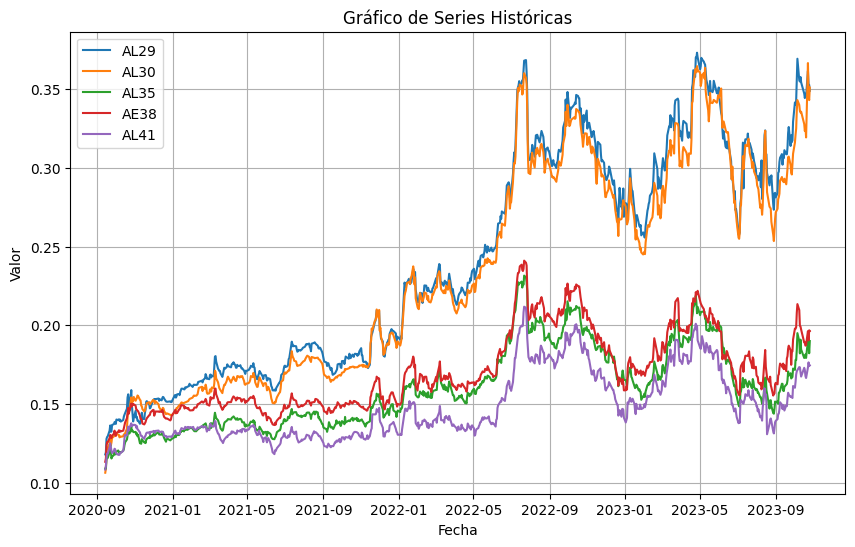

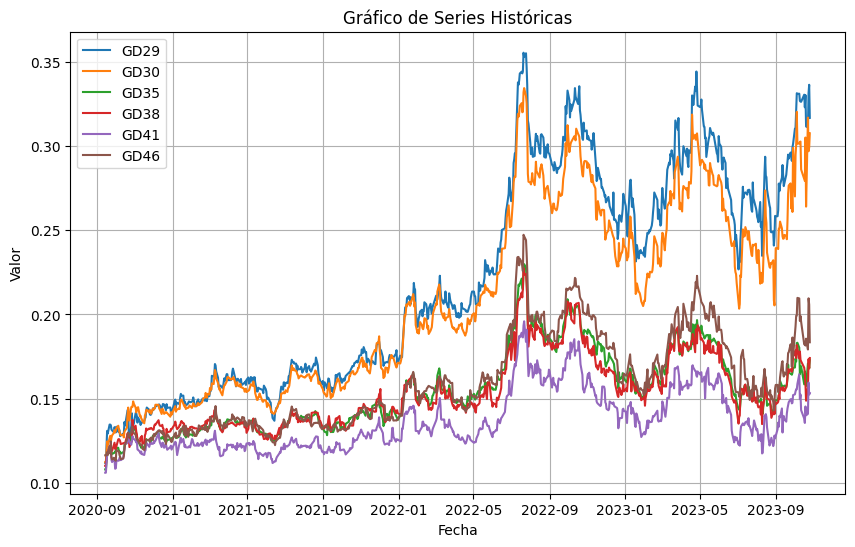

,Bond,Correlation
0,AL29,0.962274
1,AL30,0.964324
2,AL35,0.964627
3,AE38,0.955287
4,AL41,0.933401
5,GD29,0.973899
6,GD30,0.983622
7,GD35,0.959552
8,GD38,0.947356
9,GD41,0.928025


In [20]:
#Grafico las PDs de cada Bono de Ley Local

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

for i in Bonds_LocalLaw:
    plt.plot(PDs_Cond_LocalLaw.index, PDs_Cond_LocalLaw[i], label=i)

plt.legend()

# Crear un segundo eje de ordenadas (secundario)
#plt.twinx()

# Agregar la serie secundaria al eje secundario
#plt.plot(CR.index, CR, color='r', label='Country Risk')

# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

#Grafico las PDs de cada Bono de Ley Extranjera

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

for i in Bonds_ForeignLaw:
    plt.plot(PDs_Cond_ForeignLaw.index, PDs_Cond_ForeignLaw[i], label=i)

plt.legend()

# Crear un segundo eje de ordenadas (secundario)
#plt.twinx()

# Agregar la serie secundaria al eje secundario
#plt.plot(CR.index, CR, color='r', label='Country Risk')

# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

#Calculo el coeficiente de Correlación

Correlation_LocalLaw = {'Bond' : [i for i in Bonds_LocalLaw],
        'Correlation' : [CR['ARG'].corr(PDs_Cond_LocalLaw[i]) for i in Bonds_LocalLaw]}

Correlation_LocalLaw = pd.DataFrame(Correlation_LocalLaw)


Correlation_ForeignLaw = {'Bond' : [i for i in Bonds_ForeignLaw],
        'Correlation' : [CR['ARG'].corr(PDs_Cond_ForeignLaw[i]) for i in Bonds_ForeignLaw]}

Correlation_ForeignLaw = pd.DataFrame(Correlation_ForeignLaw)
Correlation = pd.concat([Correlation_LocalLaw, Correlation_ForeignLaw], ignore_index=True)
Correlation

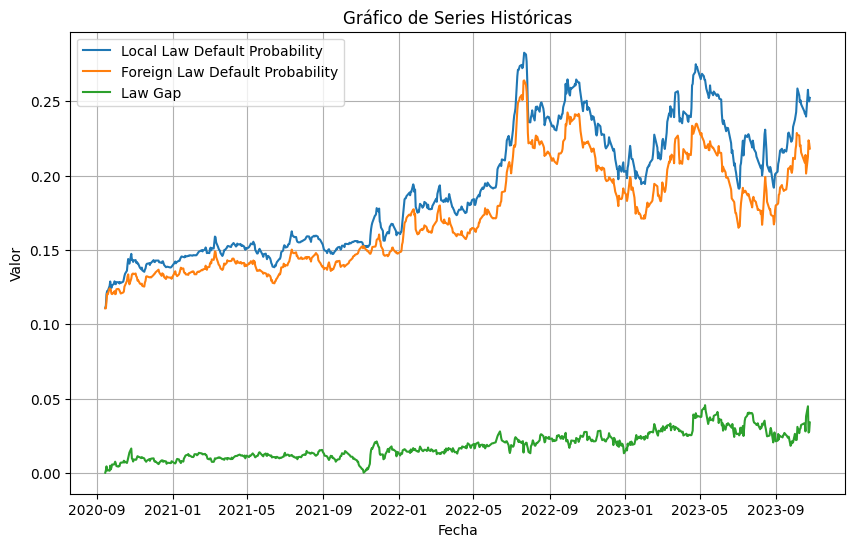

In [21]:
#Graficar La prob promedio de lo que es Ley Local y Ley Extranjera y también el GAP entre ambas
#Graficar el GAP promedio histórico

LL = PDs_Cond_LocalLaw.copy()
LL['Local Law Default Probability'] = LL.mean(axis=1)
LL = LL['Local Law Default Probability']

FL = PDs_Cond_ForeignLaw.copy()
FL['Foreign Law Default Probability'] = FL.mean(axis=1)
FL = FL['Foreign Law Default Probability']

Law_Gap = LL - FL

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

plt.plot(LL.index, LL, label='Local Law Default Probability')
plt.plot(FL.index, FL, label='Foreign Law Default Probability')
plt.plot(Law_Gap.index, Law_Gap, label='Law Gap')


# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

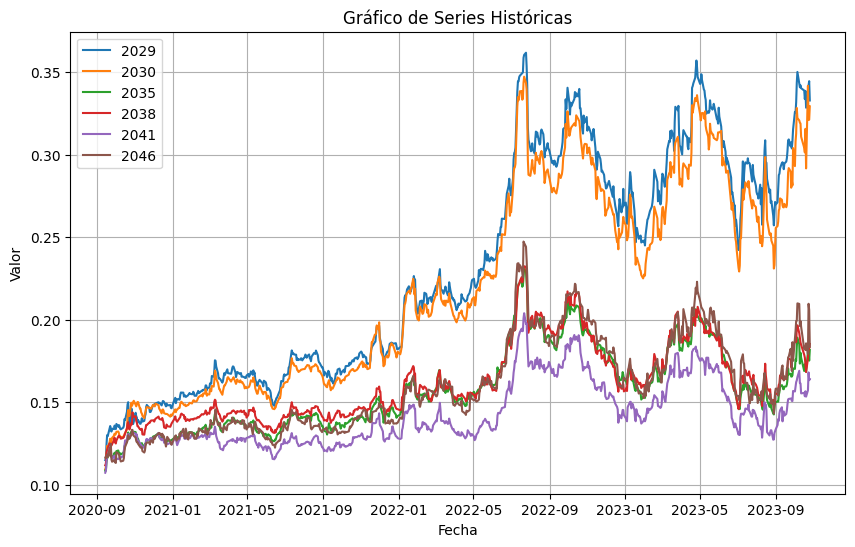

In [22]:
#Graficar la prob promedio según fecha de Vto

# Maturity 2029

PDs_2029 = pd.DataFrame()
PDs_2029['AL29'] = PDs_Cond_LocalLaw['AL29']
PDs_2029['GD29'] = PDs_Cond_ForeignLaw['GD29']
PDs_2029['2029'] = PDs_2029.mean(axis=1)
PDs_2029 = PDs_2029['2029']

PDs_2030 = pd.DataFrame()
PDs_2030['AL30'] = PDs_Cond_LocalLaw['AL30']
PDs_2030['GD30'] = PDs_Cond_ForeignLaw['GD30']
PDs_2030['2030'] = PDs_2030.mean(axis=1)
PDs_2030 = PDs_2030['2030']

PDs_2035 = pd.DataFrame()
PDs_2035['AL35'] = PDs_Cond_LocalLaw['AL35']
PDs_2035['GD35'] = PDs_Cond_ForeignLaw['GD35']
PDs_2035['2035'] = PDs_2035.mean(axis=1)
PDs_2035 = PDs_2035['2035']

PDs_2038 = pd.DataFrame()
PDs_2038['AE38'] = PDs_Cond_LocalLaw['AE38']
PDs_2038['GD38'] = PDs_Cond_ForeignLaw['GD38']
PDs_2038['2038'] = PDs_2038.mean(axis=1)
PDs_2038 = PDs_2038['2038']

PDs_2041 = pd.DataFrame()
PDs_2041['AL41'] = PDs_Cond_LocalLaw['AL41']
PDs_2041['GD41'] = PDs_Cond_ForeignLaw['GD41']
PDs_2041['2041'] = PDs_2041.mean(axis=1)
PDs_2041 = PDs_2041['2041']

PDs_2046 = pd.DataFrame()
PDs_2046['GD46'] = PDs_Cond_ForeignLaw['GD46']
PDs_2046['2046'] = PDs_2046.mean(axis=1)
PDs_2046 = PDs_2046['2046']

PDs_Maturity = pd.DataFrame()
PDs_Maturity['2029'] = PDs_2029
PDs_Maturity['2030'] = PDs_2030
PDs_Maturity['2035'] = PDs_2035
PDs_Maturity['2038'] = PDs_2038
PDs_Maturity['2041'] = PDs_2041
PDs_Maturity['2046'] = PDs_2046
PDs_Maturity

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

for i in PDs_Maturity.columns:
    plt.plot(PDs_Maturity.index, PDs_Maturity[i], label=i)

# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Hago una evolución de la probabilidad de supervivencia con cada pago de cupón para el de menor y mayor probabilidad del AL30 / GD30? (Elijo estos por tener mayor volúmen)
Hacer un cálculo de a partir de que fecha de pago la probabilidad acumulada de pago es menor al 50%. Te puede dar una idea de cuantos cupones esperas cobrar. Adicionalmente puede calcularse la vida promedio esperada.

In [104]:
#Cálculo de la probabilidad acumulada de supervivencia (pago de cada cupón) del AL30 en el momento de mayor
# y menor valor de PD y cálculo de la esperanza de vida

#Armo función para poder calcular la evolución de la probabilidad de supervivencia a cada fecha
import pandas as pd

PDs_AL30 = PDs_Cond_LocalLaw['AL30'].copy()
PDs_AL30.idxmax()
PDs_AL30.idxmin()

def VidaMediaEsperada(bond_name, date, PDs_historicas):

    import pandas as pd

    day = pd.to_datetime(date)
    pd = PDs_historicas[bond_name][day]
    cash_flow = Bonds_CashFlows[bond_name].copy()
    cash_flow = cash_flow.loc[cash_flow.index > day, ['A+R']]
    cash_flow['conteo'] = range(1,(cash_flow).shape[0]+1)
    cash_flow['PD'] = pd
    cash_flow['Probabilidad de Supervivencia'] = (1-cash_flow['PD']/2)**cash_flow['conteo']
    esperanza = cash_flow['Probabilidad de Supervivencia'].sum()
    return esperanza

VidaMediaEsperada('AL30', '2023-09-19', PDs_Condicionales)

def Evol_VidaMediaEsperada(bond_name, PDs_historicas):

    df = pd.DataFrame()

    df[bond_name] = [VidaMediaEsperada(bond_name, j, PDs_historicas) for j in PDs_historicas.index ]
    df.index = PDs_historicas.index

    return df

Evol_VidaMediaEsperada('AL30', PDs_Condicionales)


In [107]:
#Evol_VidaMediaEsperada('AL30', PDs_Condicionales)

Bonos_Esperanza = pd.DataFrame()

for i in PDs_Condicionales.columns:
    Bonos_Esperanza[i] = Evol_VidaMediaEsperada(i, PDs_Condicionales)

Bonos_Esperanza



,AL29,AL30,AL35,AE38,AL41,GD29,GD30,GD35,GD38,GD41,GD46
date,,,,,,,,,,,
2020-09-14,10.275019,11.495681,13.931860,14.351831,15.667929,10.538746,11.203206,14.019570,14.663362,15.947769,15.425365
2020-09-15,10.220555,11.372056,13.933394,14.161947,15.420467,10.538549,11.202995,14.019192,14.662911,15.947215,15.424983
2020-09-16,9.876661,10.886771,13.432064,13.455173,14.848564,10.169958,10.908830,13.642931,14.205023,15.336115,15.439457
2020-09-17,9.830005,10.719445,13.401669,13.251651,14.566571,9.761450,10.616648,13.353071,14.091860,14.734124,15.206402
2020-09-18,9.811633,10.755183,13.381111,13.260384,14.578557,9.825346,10.721989,13.264119,13.900161,14.746359,15.384578
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,4.300003,4.803397,9.087597,9.101171,10.525740,4.707930,5.668419,10.061331,11.119070,12.302480,9.662764
2023-10-23,4.118305,4.195607,8.644848,8.728706,10.140540,4.715618,4.836165,9.444601,10.670966,12.236396,10.024238
2023-10-24,4.218933,4.455707,8.653451,8.980189,9.961091,4.461081,5.130566,9.461102,9.768595,10.956874,8.488913


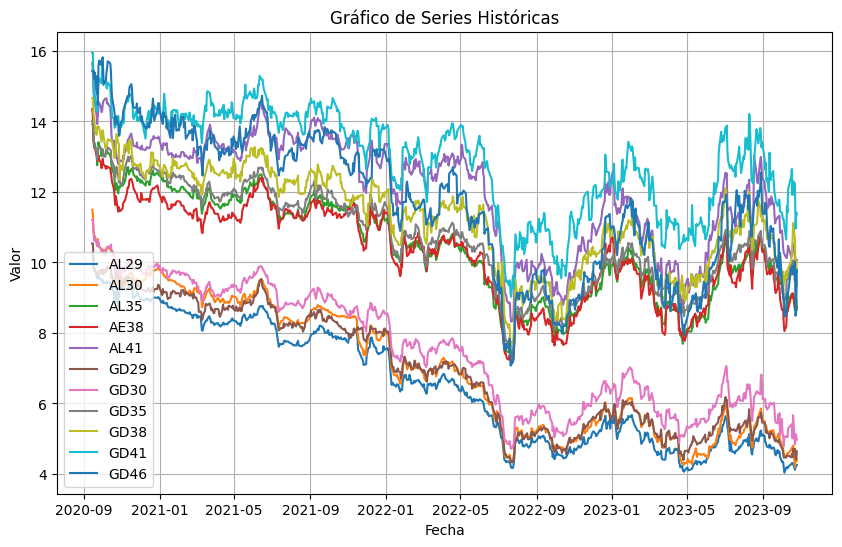

In [108]:
# Graficar las esperanzas de vidas de cada Bono

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

for i in Bonos_Esperanza.columns:
    plt.plot(Bonos_Esperanza.index, Bonos_Esperanza[i], label= i)

# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

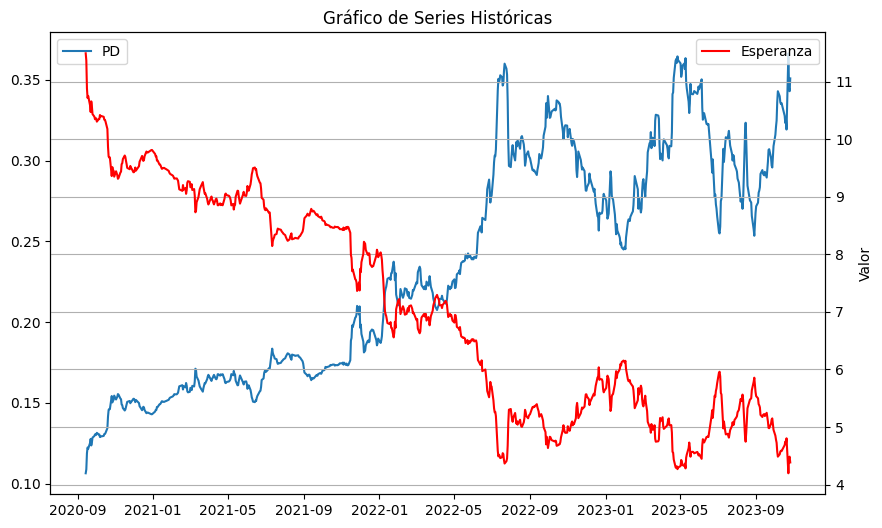

In [112]:
# Relación entre la evolución de las PDs y de la Esperanza de Vida

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

plt.plot(PDs_Condicionales.index, PDs_Condicionales['AL30'], label= 'PD')
plt.legend()

plt.twinx()
plt.plot(Bonos_Esperanza.index, Bonos_Esperanza['AL30'], color='r', label= 'Esperanza')


# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [106]:
PDs_Condicionales.columns

Index(['AL29', 'AL30', 'AL35', 'AE38', 'AL41', 'GD29', 'GD30', 'GD35', 'GD38',
       'GD41', 'GD46'],
      dtype='object')

COMPARACIÓN ENTRE AMBOS MODELOS

0) Probabilidad promedio del modelo marginal vs condicional y el gap
1) Graficar para cada bono los cálculos de cada probabilidad y el gap correspondiente
2) Graficar el anterior pero por año de vto y gap correspondiente
3) Correlaciones vs Riesgo País

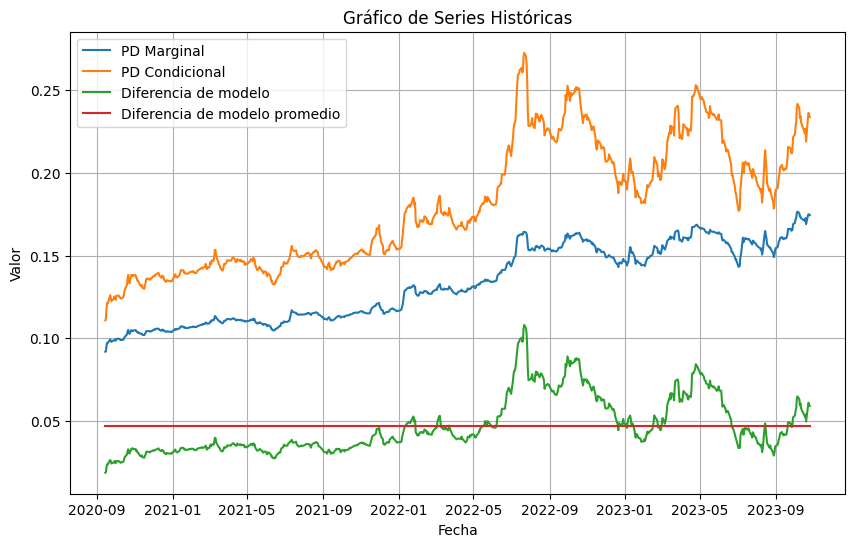

In [82]:
#0) Probabilidad promedio del modelo marginal vs condicional y el gap

#Graficar La prob promedio de lo que es Marginal y Condicional y también el GAP entre ambas
#Graficar el GAP promedio histórico

Model_Gap = PDs_Cond - PDs_Mg

# Crear un gráfico de líneas para cada serie con leyenda
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

# Graficar cada serie y agregar una leyenda

plt.plot(PDs_Mg.index, PDs_Mg, label='PD Marginal')
plt.plot(PDs_Cond.index, PDs_Cond, label='PD Condicional')
plt.plot(Model_Gap.index, Model_Gap, label='Diferencia de modelo')
plt.plot(Model_Gap.index, [Model_Gap.mean() for j in range(len(Model_Gap.index))], label='Diferencia de modelo promedio')


# Agregar una leyenda
plt.legend()

# Personalizar el gráfico
plt.title('Gráfico de Series Históricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

# Mostrar el gráfico
plt.show()



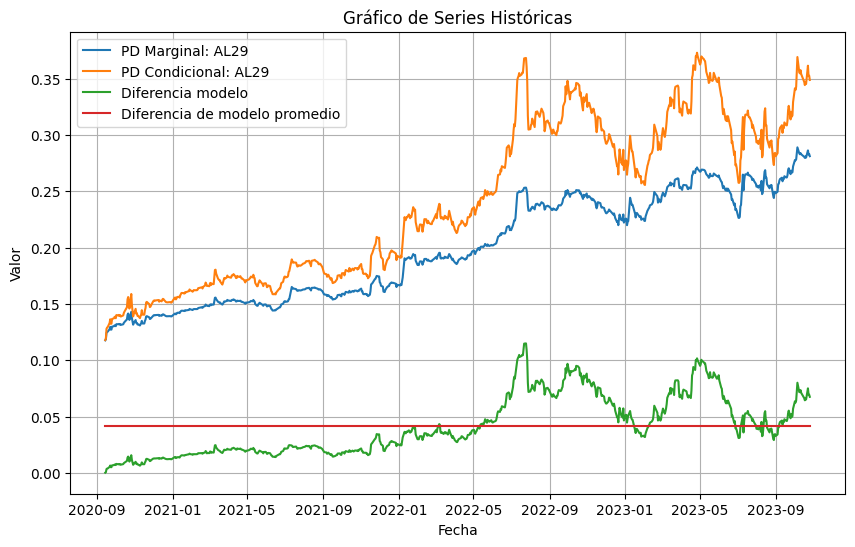

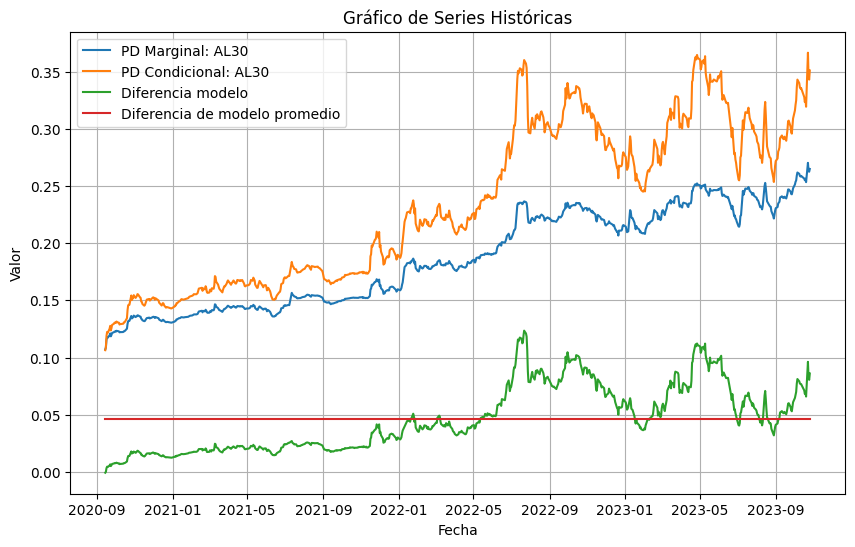

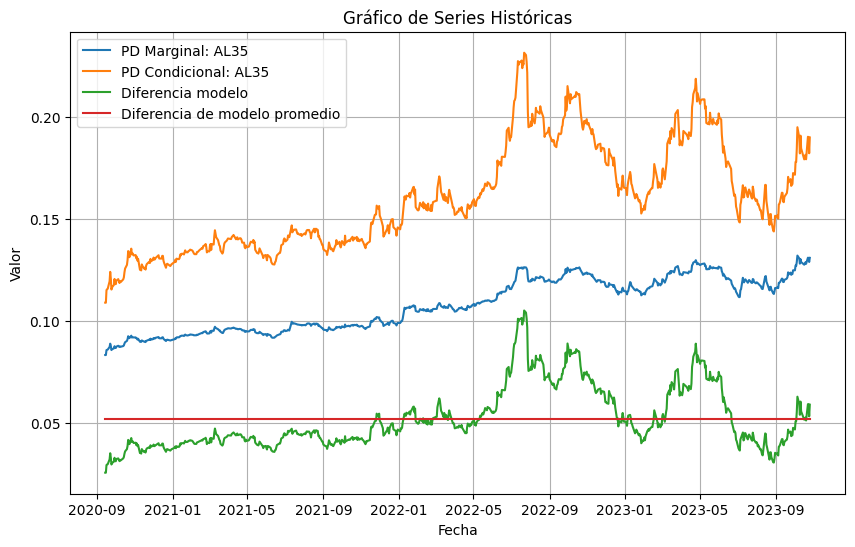

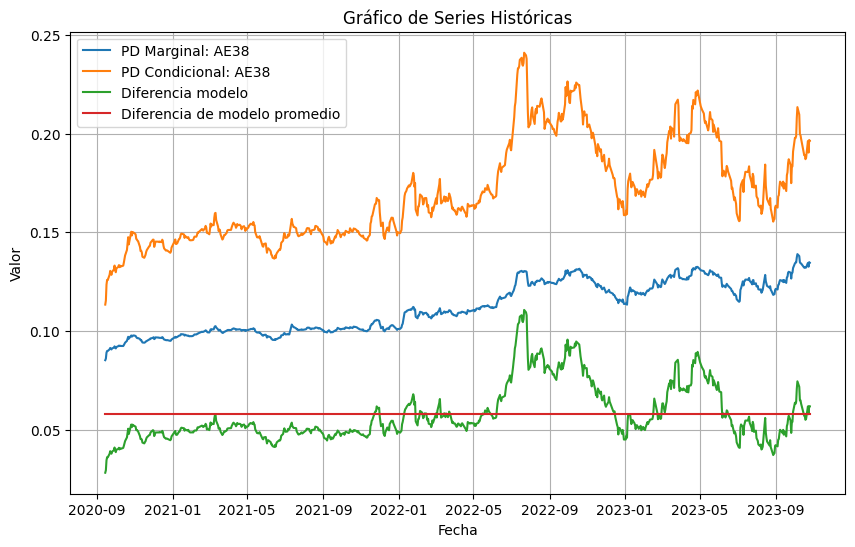

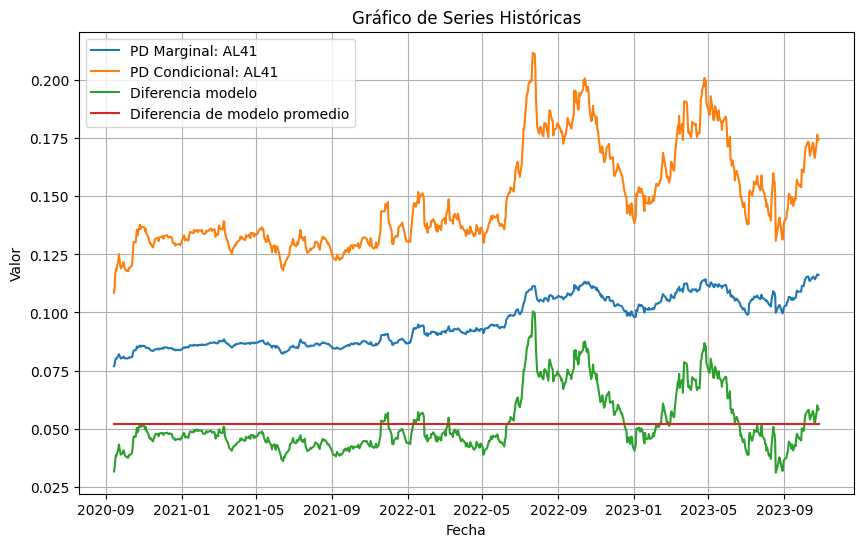

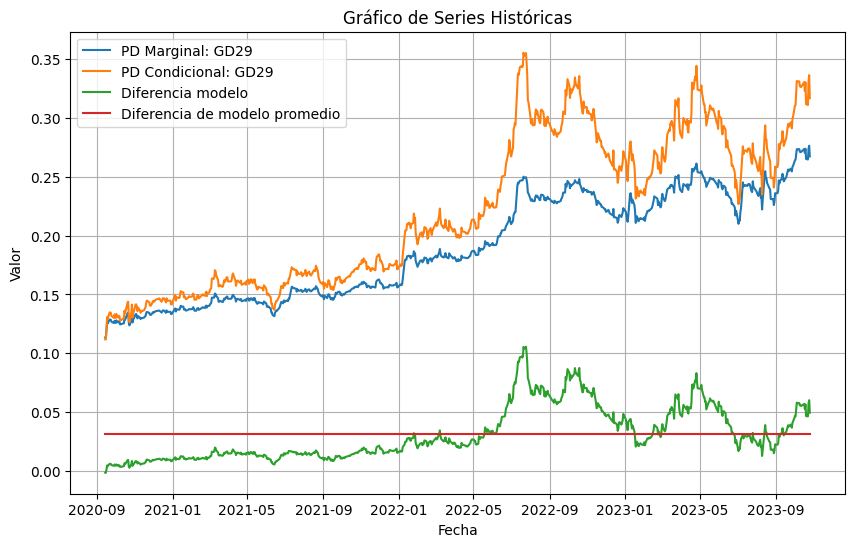

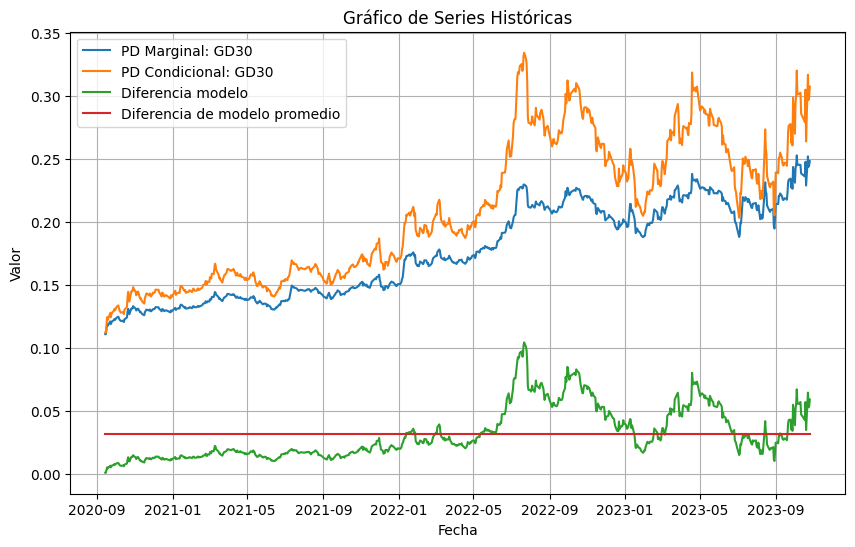

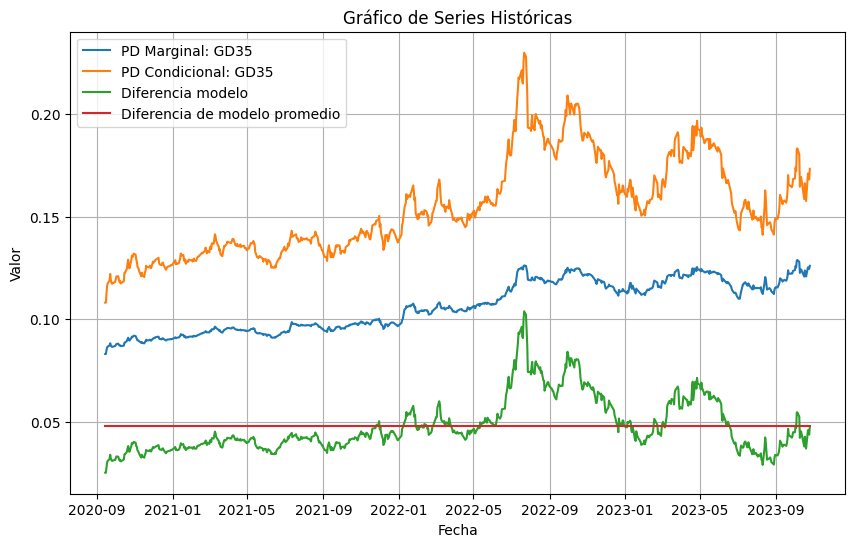

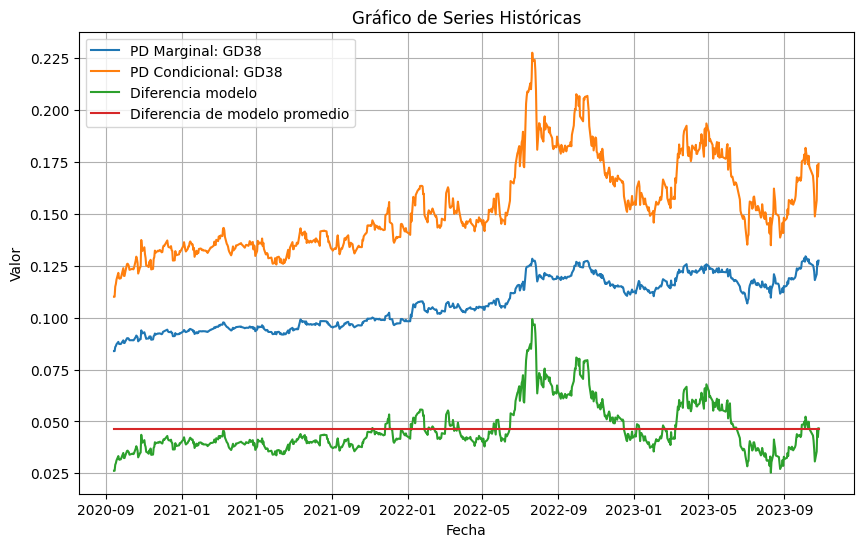

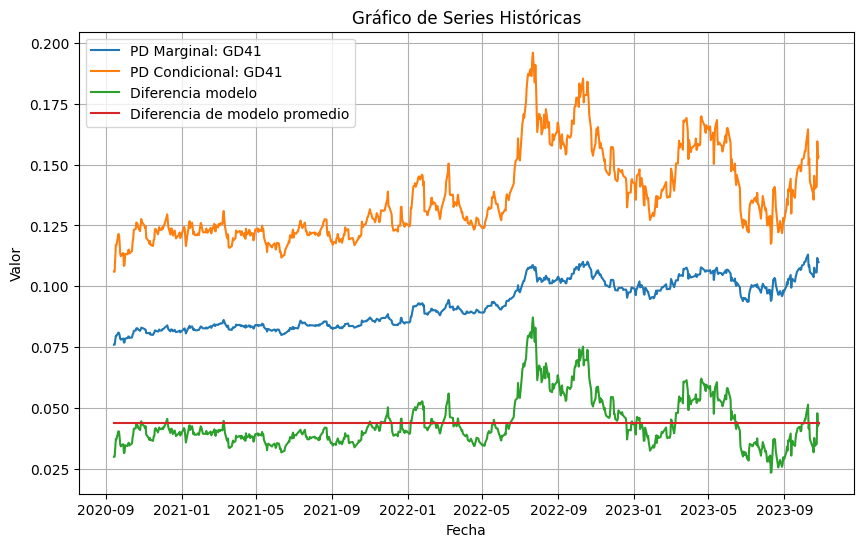

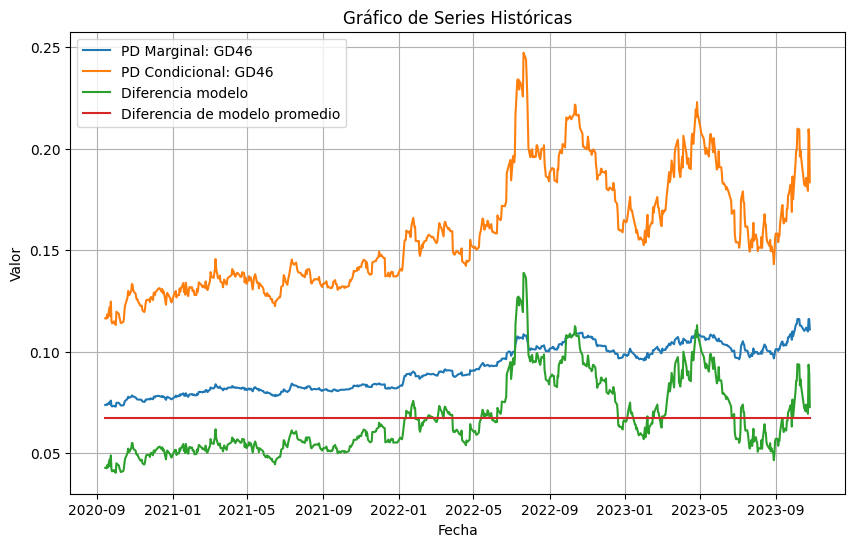

    Bond  Diferencia
0   AL29    0.041604
1   AL30    0.046312
2   AL35    0.052015
3   AE38    0.057942
4   AL41    0.052129
5   GD29    0.030979
6   GD30    0.032047
7   GD35    0.047866
8   GD38    0.046129
9   GD41    0.043765
10  GD46    0.067152
Diferencia Media de Modelos Total: 0.04708555234789059


In [81]:
# 1) Graficar para cada bono los cálculos de cada probabilidad y el gap correspondiente



# Graficar cada serie y agregar una leyenda

for i in PDs_Marginales.columns:
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
    plt.plot(PDs_Marginales.index, PDs_Marginales[i], label= f"PD Marginal: {i}")
    plt.plot(PDs_Condicionales.index, PDs_Condicionales[i], label=f"PD Condicional: {i}")
    plt.plot(PDs_Condicionales.index, PDs_Condicionales[i]- PDs_Marginales[i], label=f"Diferencia modelo")
    plt.plot(PDs_Condicionales.index, [(PDs_Condicionales[i]- PDs_Marginales[i]).mean() for j in range(len(PDs_Condicionales.index))], label=f"Diferencia de modelo promedio")


    # Agregar una leyenda
    plt.legend()

    # Personalizar el gráfico
    plt.title('Gráfico de Series Históricas')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()


#Armo data Frame con Gaps entre las probabilidades de cada modelo

Diferencia_Modelo_Media = {'Bond' : [i for i in PDs_Marginales.columns],
        'Diferencia' : [(PDs_Condicionales[i]- PDs_Marginales[i]).mean() for i in PDs_Marginales.columns]}

Diferencia_Modelo_Media = pd.DataFrame(Diferencia_Modelo_Media)
print(Diferencia_Modelo_Media)
print(f"Diferencia Media de Modelos Total: {Diferencia_Modelo_Media['Diferencia'].mean()}")



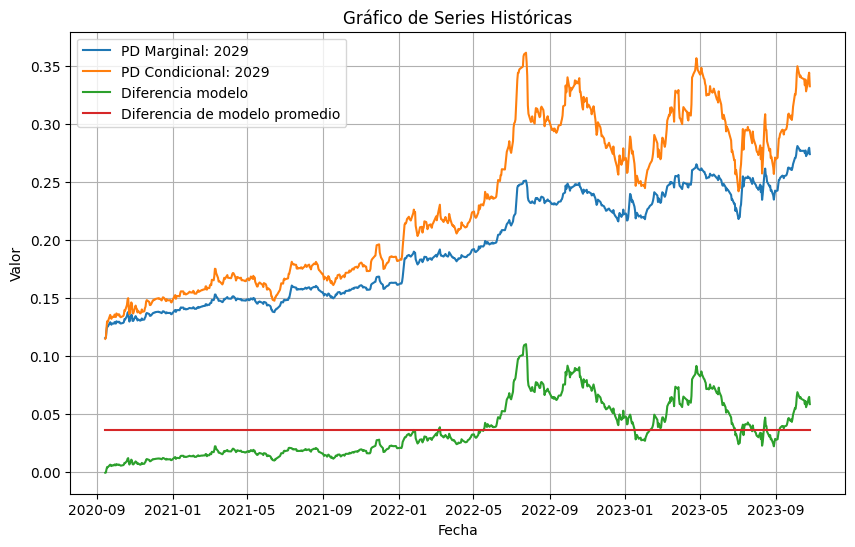

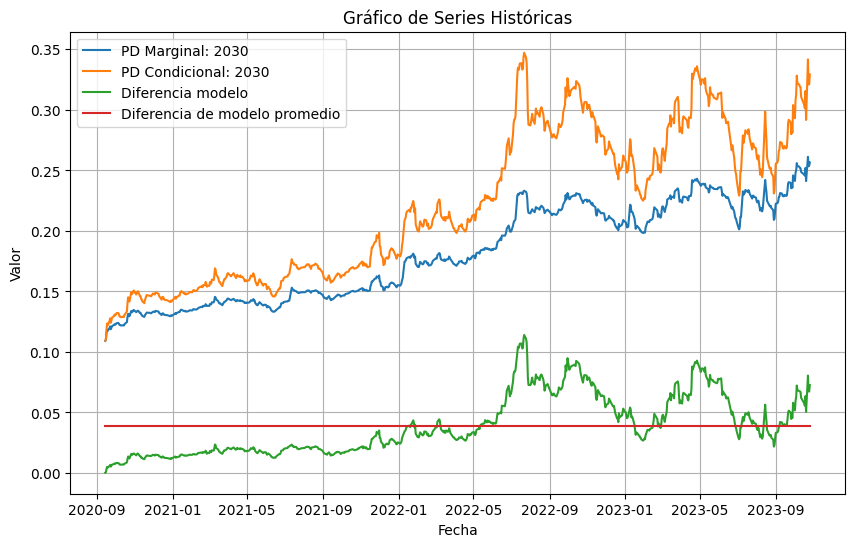

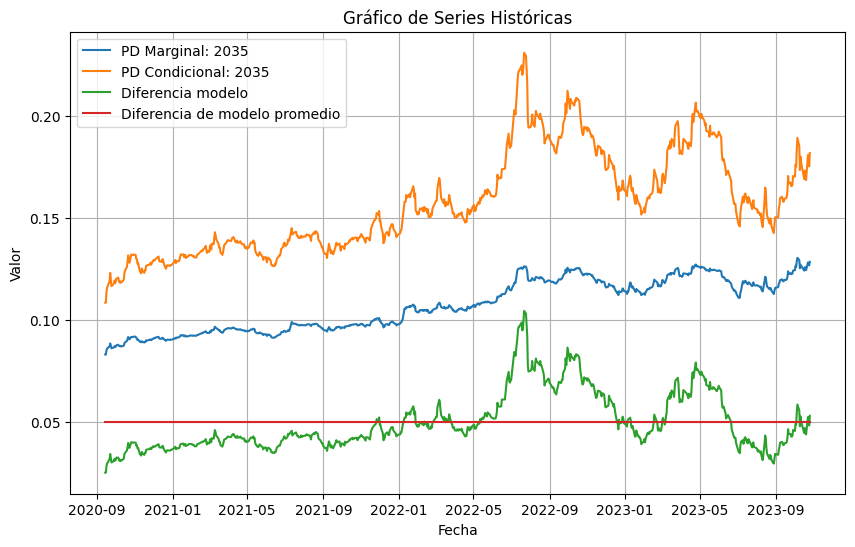

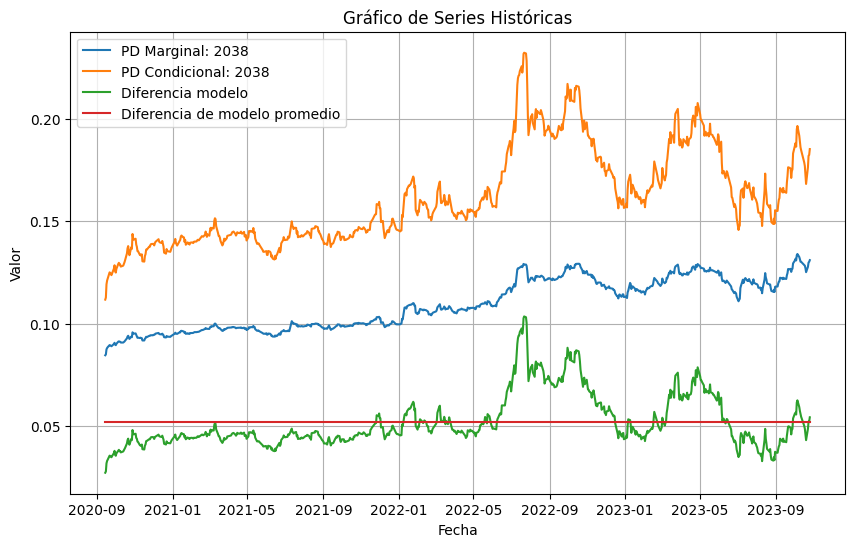

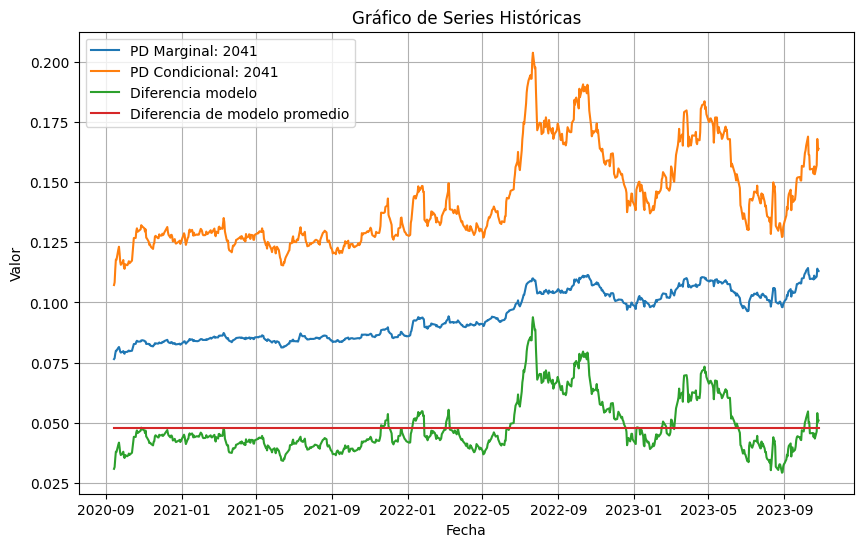

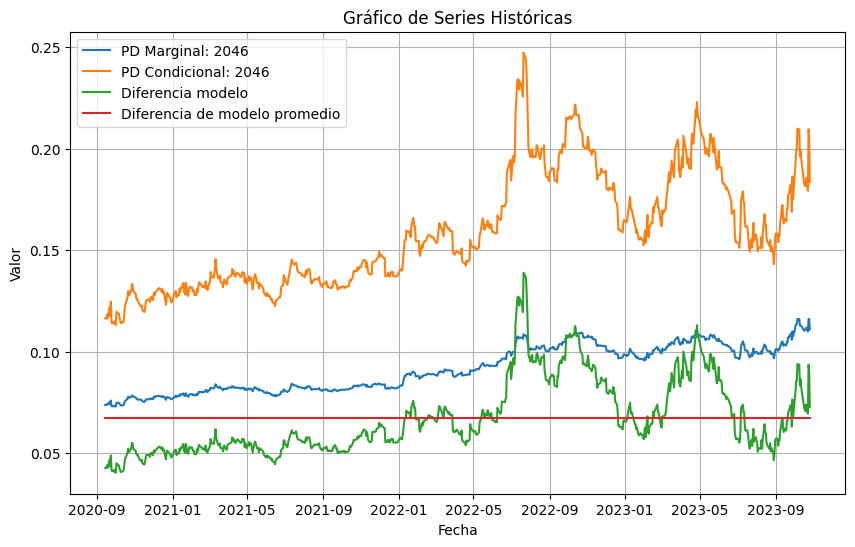

    Año  Diferencia
0  2029    0.036292
1  2030    0.039179
2  2035    0.049940
3  2038    0.052036
4  2041    0.047947
5  2046    0.067152
Diferencia Media de Modelos Total: 0.048757764718272874


In [109]:
#2) Graficar el anterior pero por año de vto y gap correspondiente


# Graficar cada serie y agregar una leyenda

#Graficar la prob promedio según fecha de Vto

# Maturity 2029

PDs_2029 = pd.DataFrame()
PDs_2029['Marginal'] = PDs_Marginales[['AL29', 'GD29']].copy().mean(axis=1)
PDs_2029['Condicional'] = PDs_Condicionales[['AL29', 'GD29']].copy().mean(axis=1)
PDs_2029['Diferencia Modelo'] = PDs_2029['Condicional'] - PDs_2029['Marginal']

PDs_2030 = pd.DataFrame()
PDs_2030['Marginal'] = PDs_Marginales[['AL30', 'GD30']].copy().mean(axis=1)
PDs_2030['Condicional'] = PDs_Condicionales[['AL30', 'GD30']].copy().mean(axis=1)
PDs_2030['Diferencia Modelo'] = PDs_2030['Condicional'] - PDs_2030['Marginal']

PDs_2035 = pd.DataFrame()
PDs_2035['Marginal'] = PDs_Marginales[['AL35', 'GD35']].copy().mean(axis=1)
PDs_2035['Condicional'] = PDs_Condicionales[['AL35', 'GD35']].copy().mean(axis=1)
PDs_2035['Diferencia Modelo'] = PDs_2035['Condicional'] - PDs_2035['Marginal']

PDs_2038 = pd.DataFrame()
PDs_2038['Marginal'] = PDs_Marginales[['AE38', 'GD38']].copy().mean(axis=1)
PDs_2038['Condicional'] = PDs_Condicionales[['AE38', 'GD38']].copy().mean(axis=1)
PDs_2038['Diferencia Modelo'] = PDs_2038['Condicional'] - PDs_2038['Marginal']

PDs_2041 = pd.DataFrame()
PDs_2041['Marginal'] = PDs_Marginales[['AL41', 'GD41']].copy().mean(axis=1)
PDs_2041['Condicional'] = PDs_Condicionales[['AL41', 'GD41']].copy().mean(axis=1)
PDs_2041['Diferencia Modelo'] = PDs_2041['Condicional'] - PDs_2041['Marginal']

PDs_2046 = pd.DataFrame()
PDs_2046['Marginal'] = PDs_Marginales[['GD46']].copy().mean(axis=1)
PDs_2046['Condicional'] = PDs_Condicionales[['GD46']].copy().mean(axis=1)
PDs_2046['Diferencia Modelo'] = PDs_2046['Condicional'] - PDs_2046['Marginal']

PDs_Anuales = {'2029': PDs_2029, '2030': PDs_2030, '2035': PDs_2035, '2038': PDs_2038, '2041': PDs_2041, '2046': PDs_2046}

for i in PDs_Anuales.keys():
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
    plt.plot(PDs_Anuales[i].index, PDs_Anuales[i]['Marginal'], label= f"PD Marginal: {i}")
    plt.plot(PDs_Anuales[i].index, PDs_Anuales[i]['Condicional'], label=f"PD Condicional: {i}")
    plt.plot(PDs_Anuales[i].index, PDs_Anuales[i]['Diferencia Modelo'], label=f"Diferencia modelo")
    plt.plot(PDs_Anuales[i].index, [PDs_Anuales[i]['Diferencia Modelo'].mean() for j in range(len(PDs_Anuales[i].index))], label=f"Diferencia de modelo promedio")


    # Agregar una leyenda
    plt.legend()

    # Personalizar el gráfico
    plt.title('Gráfico de Series Históricas')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()


#Armo data Frame con Gaps entre las probabilidades de año

Diferencia_Modelo_Media = {'Año' : [i for i in PDs_Anuales.keys()],
        'Diferencia' : [PDs_Anuales[i]['Diferencia Modelo'].mean() for i in PDs_Anuales.keys()]}

Diferencia_Modelo_Media = pd.DataFrame(Diferencia_Modelo_Media)
print(Diferencia_Modelo_Media)
print(f"Diferencia Media de Modelos Total: {Diferencia_Modelo_Media['Diferencia'].mean()}")





In [156]:
#3) Correlaciones vs Riesgo País

Correlation_LocalLaw = {'Bono' : [i for i in Bonds_LocalLaw],
        'Correlación Marginal' : [CR['ARG'].corr(PDs_LocalLaw[i]) for i in Bonds_LocalLaw]}

Correlation_LocalLaw = pd.DataFrame(Correlation_LocalLaw)


Correlation_ForeignLaw = {'Bono' : [i for i in Bonds_ForeignLaw],
        'Correlación Marginal' : [CR['ARG'].corr(PDs_ForeignLaw[i]) for i in Bonds_ForeignLaw]}

Correlation_ForeignLaw = pd.DataFrame(Correlation_ForeignLaw)

Correlacion_Marginal = pd.concat([Correlation_LocalLaw, Correlation_ForeignLaw], ignore_index=True)
Correlacion_Marginal


Correlation_LocalLaw = {'Bono' : [i for i in Bonds_LocalLaw],
        'Correlación Concicional' : [CR['ARG'].corr(PDs_Cond_LocalLaw[i]) for i in Bonds_LocalLaw]}

Correlation_LocalLaw = pd.DataFrame(Correlation_LocalLaw)


Correlation_ForeignLaw = {'Bono' : [i for i in Bonds_ForeignLaw],
        'Correlación Concicional' : [CR['ARG'].corr(PDs_Cond_ForeignLaw[i]) for i in Bonds_ForeignLaw]}

Correlation_ForeignLaw = pd.DataFrame(Correlation_ForeignLaw)
Correlacion_Condicional = pd.concat([Correlation_LocalLaw, Correlation_ForeignLaw], ignore_index=True)
Correlacion_Condicional

Correlacion = pd.merge(Correlacion_Marginal, Correlacion_Condicional, on='Bono', how='left' )
Correlacion['Diferencia'] = Correlacion['Correlación Marginal'] - Correlacion['Correlación Concicional']
print(Correlacion)

print(f'Valores Promedios:')
Correlacion.iloc[:, 1:].mean()

    Bono  Correlación Marginal  Correlación Concicional  Diferencia
0   AL29              0.909485                 0.962274   -0.052789
1   AL30              0.915257                 0.964324   -0.049067
2   AL35              0.953339                 0.964627   -0.011287
3   AE38              0.946579                 0.955287   -0.008708
4   AL41              0.943730                 0.933401    0.010330
5   GD29              0.928170                 0.973899   -0.045729
6   GD30              0.944521                 0.983622   -0.039100
7   GD35              0.957987                 0.959552   -0.001565
8   GD38              0.960659                 0.947356    0.013303
9   GD41              0.963682                 0.928025    0.035657
10  GD46              0.954461                 0.969917   -0.015457
Valores Promedios:


Correlación Marginal       0.943443
Correlación Concicional    0.958389
Diferencia                -0.014947
dtype: float64